In [ ]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import joblib


In [3]:
df = pd.read_csv("../data/dataset_ready/features.csv")
print("✅ Dataset cargado:", df.shape)

# Features y etiquetas
X = df[['angle_knee_left', 'angle_knee_right', 'angle_hip_left', 'angle_hip_right',
        'trunk_inclination', 'shoulder_dist', 'hip_dist']]
y = df['label']

# Normalizar (opcional, pero mejora el entrenamiento)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "./models/scaler.pkl")
print("✅ Scaler guardado.")
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

✅ Dataset cargado: (13361, 9)
✅ Scaler guardado.
Tamaño de entrenamiento: (10688, 7)
Tamaño de prueba: (2673, 7)


In [4]:
# Convertir etiquetas a one-hot encoding (opcional, pero útil)
num_classes = len(df['label'].unique())
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Definir modelo
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\alejo\Documents\SEMESTRE VII\APO III\TI2\ti2-2025-1-e9-ds\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,525 (45.02 KB)

 Trainable params: 11,525 (45.02 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_data=(X_test, y_test_cat))
model.save("./models/movimiento_classifier.h5")
print("✅ Modelo guardado.")

Epoch 1/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3539 - loss: 1.4087 - val_accuracy: 0.4815 - val_loss: 1.1868
Epoch 2/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4766 - loss: 1.2201 - val_accuracy: 0.5152 - val_loss: 1.1095
Epoch 3/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4898 - loss: 1.1514 - val_accuracy: 0.5481 - val_loss: 1.0622
Epoch 4/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5060 - loss: 1.1067 - val_accuracy: 0.5361 - val_loss: 1.0363
Epoch 5/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5199 - loss: 1.0907 - val_accuracy: 0.5294 - val_loss: 1.0295
Epoch 6/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5209 - loss: 1.0698 - val_accuracy: 0.5653 - val_loss: 0.9896
Epoch 7/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5342 - loss: 1.0503 - val_accuracy: 0.5559 - val_loss: 0.9761
Epoch 8/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5405 - loss: 1.0371 - val_accuracy: 0.

✅ Modelo guardado.


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.7497
🔍 Accuracy en prueba: 0.68


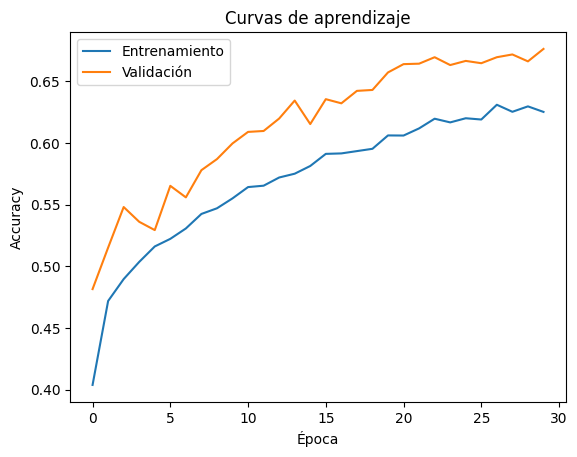

In [6]:
# Evaluar en el set de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"🔍 Accuracy en prueba: {test_acc:.2f}")

# Visualizar curvas de entrenamiento
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de aprendizaje')
plt.show()

In [7]:
# Cargar modelo
model = load_model("./models/movimiento_classifier.h5")

# Supongamos que tienes un nuevo vector de features:
new_features = np.array([[130, 125, 120, 115, 75, 0.05, 0.02]])
new_features_scaled = scaler.transform(new_features)

# Predicción
prediction = model.predict(new_features_scaled)
class_idx = np.argmax(prediction)
print("Predicción:", class_idx)

c:\Users\alejo\Documents\SEMESTRE VII\APO III\TI2\ti2-2025-1-e9-ds\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicción: 0
